<a href="https://colab.research.google.com/github/shayanshafquat/DeepLearning/blob/main/transfer_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
%cd  /content/gdrive/MyDrive

/content/gdrive/MyDrive


In [6]:
%tensorflow_version 2.x
import tensorflow as tf
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import tensorflow_datasets as tfds
# import tensorflow_addons as tfa #extra addons
import tensorflow_hub as hub
import os
import seaborn as sns
import random

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [4]:
(train_ds, validation_ds, test_ds), metadata = tfds.load('cats_vs_dogs',
split=['train[:80%]', 'train[80%:90%]', 'train[90%:]'],
with_info=True,
as_supervised=True)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/1 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/23262 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/cats_vs_dogs/4.0.1.incompleteW2CS6Q/cats_vs_dogs-train.tfrecord*...:   0%|…

Dataset cats_vs_dogs downloaded and prepared to /root/tensorflow_datasets/cats_vs_dogs/4.0.1. Subsequent calls will reuse this data.


In [8]:
metadata

tfds.core.DatasetInfo(
    name='cats_vs_dogs',
    full_name='cats_vs_dogs/4.0.1',
    description="""
    A large set of images of cats and dogs. There are 1738 corrupted images that are dropped.
    """,
    homepage='https://www.microsoft.com/en-us/download/details.aspx?id=54765',
    data_dir=PosixGPath('/tmp/tmpavzn14jqtfds'),
    file_format=tfrecord,
    download_size=786.67 MiB,
    dataset_size=1.04 GiB,
    features=FeaturesDict({
        'image': Image(shape=(None, None, 3), dtype=uint8),
        'image/filename': Text(shape=(), dtype=string),
        'label': ClassLabel(shape=(), dtype=int64, num_classes=2),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    splits={
        'train': <SplitInfo num_examples=23262, num_shards=16>,
    },
    citation="""@Inproceedings (Conference){asirra-a-captcha-that-exploits-interest-aligned-manual-image-categorization,
    author = {Elson, Jeremy and Douceur, John (JD) and Howell, Jon and Saul, Jared},
    

In [14]:
# Print the shape of the first element of each dataset
for ds in [train_ds, validation_ds, test_ds]:
  print(ds.take(1))
  for image, label in ds.take(1):
      print(image.shape, label)

<_TakeDataset element_spec=(TensorSpec(shape=(None, None, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>
(262, 350, 3) tf.Tensor(1, shape=(), dtype=int64)
<_TakeDataset element_spec=(TensorSpec(shape=(None, None, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>
(176, 168, 3) tf.Tensor(1, shape=(), dtype=int64)
<_TakeDataset element_spec=(TensorSpec(shape=(None, None, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>
(500, 377, 3) tf.Tensor(0, shape=(), dtype=int64)


image shape:  (262, 350, 3)
label: 1
image shape:  (409, 336, 3)
label: 1
image shape:  (493, 500, 3)
label: 1
image shape:  (375, 500, 3)
label: 0
image shape:  (240, 320, 3)
label: 1


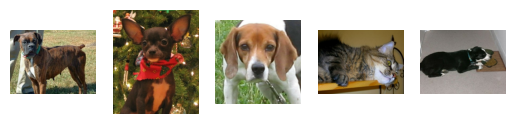

In [15]:
dataset = train_ds.map(
    lambda image, label: (tf.image.convert_image_dtype(image, tf.float64), label)
).take(5
)

f, axarr = plt.subplots(1,5)

i = 0
for image, label in dataset:
  print('image shape: ', np.shape(image));
  tf.print('label:',label);
  axarr[i].imshow(image);
  axarr[i].axis('off');
  i=i+1